In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("student_scores.csv")
print(data)
# independent variable: hours
# dependent variable: scores

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [7]:
data.shape

(25, 2)

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<function matplotlib.pyplot.show(close=None, block=None)>

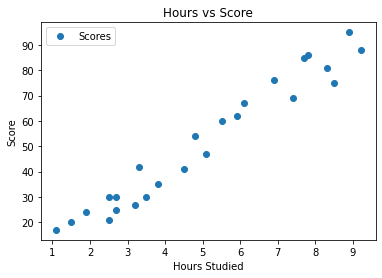

In [10]:
# Create the plot. We can see if it exists a correlations, after we will see 
# how strong is it.

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show

In [14]:
# The next step is to divide the data into "attributes" and "labels". 
# Attributes are the independent variables while labels are dependent 
# variables whose values are to be predicted

X=data.iloc[:, :-1].values
Y=data.iloc[:,1].values


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
# We have split our data into training and testing sets, and now is finally 
# the time to train our algorithm.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


In [21]:
# Now that we have trained our algorithm, it's time to make some
# predictions. To do so, we will use our test data and see how 
# accurately our algorithm predicts the percentage score. To make 
# pre-dictions on the test data, execute the following script:

y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# Evaluating the algorithm 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# It s a good job

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [29]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regressor.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regressor.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regressor.intercept_)


Coefficients: 
 [9.91065648]
Independent term: 
 2.018160041434683


In [31]:
y_10 = regressor.predict([[10]])
print(int(y_10))

101


<function matplotlib.pyplot.show(close=None, block=None)>

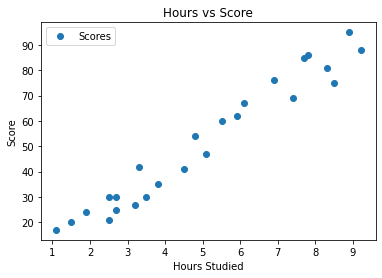

In [55]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')

plt.show



In [82]:
# i am trying to print the 
x_teo=np.array([[0],[1],[2],[4],[5],[6],[7],[8],[9],[10]])
print(x_teo)

y_teo=regressor.coef_*x_teo+regressor.intercept_
print(y_teo)

[[ 0]
 [ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  2.01816004]
 [ 11.92881652]
 [ 21.839473  ]
 [ 41.66078596]
 [ 51.57144244]
 [ 61.48209893]
 [ 71.39275541]
 [ 81.30341189]
 [ 91.21406837]
 [101.12472485]]


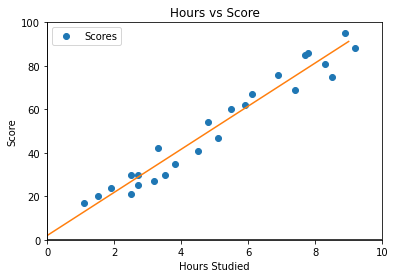

In [91]:
from matplotlib import pyplot
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')


#Función Lineal.
def f(x_teo):
    return regressor.coef_*x_teo+regressor.intercept_
#En esta variable se genera una lista con valores del -10 al 10.
#Todos estos valores serán los que tomara x.
x_teo = range(0, 10)

#Con el método plot especificamos que función graficaremos.
#El primer argumento es la variable con los valores de x.
#El segundo argumento le pasamos todos estos valares a la función con ayuda de un bucle.
pyplot.plot(x, [f(i) for i in x_teo])

#Establecemos el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

#Especificamos los limites de los ejes.
pyplot.xlim(0, 10)
pyplot.ylim(0, 100)

#Guardamos el grafico en una imagen "png".
pyplot.savefig("función_lineal.png")

# Mostramos el gráfico.
pyplot.show()